In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('cover_data.csv')

label_col = 'class'
X = df.drop(columns =[label_col])
y = df[label_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

scaler = StandardScaler()
#scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data
X_test_scaled = scaler.transform(X_test)


In [3]:
model = Sequential(name='TreeClassifier',)

model_input_size = X.shape[1]
model.add(InputLayer(input_shape=(model_input_size,), name='Input' ))
model.add(Dense(model_input_size, activation='relu', name='Hidden_1'))
model.add(Dense(model_input_size, activation='relu', name='Hidden_2'))
model.add(Dense(model_input_size // 2, activation='relu', name='Hidden_3'))
model.add(Dense(model_input_size // 2, activation='relu', name='Hidden_4'))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# print(model.summary())


Epoch 1/30
2325/2325 [==============================] - 8s 3ms/step - loss: 0.5919 - accuracy: 0.7481
Epoch 2/30
2325/2325 [==============================] - 7s 3ms/step - loss: 0.4813 - accuracy: 0.7930
Epoch 3/30
2325/2325 [==============================] - 7s 3ms/step - loss: 0.4418 - accuracy: 0.8139
Epoch 4/30
2325/2325 [==============================] - 7s 3ms/step - loss: 0.4148 - accuracy: 0.8267
Epoch 5/30
2325/2325 [==============================] - 8s 3ms/step - loss: 0.3948 - accuracy: 0.8359
Epoch 6/30
2325/2325 [==============================] - 9s 4ms/step - loss: 0.3789 - accuracy: 0.8430
Epoch 7/30
2325/2325 [==============================] - 7s 3ms/step - loss: 0.3663 - accuracy: 0.8491
Epoch 8/30
2325/2325 [==============================] - 7s 3ms/step - loss: 0.3562 - accuracy: 0.8531
Epoch 9/30
2325/2325 [==============================] - 7s 3ms/step - loss: 0.3471 - accuracy: 0.8573
Epoch 10/30
2325/2325 [==============================] - 6s 3ms/step - loss: 0.339

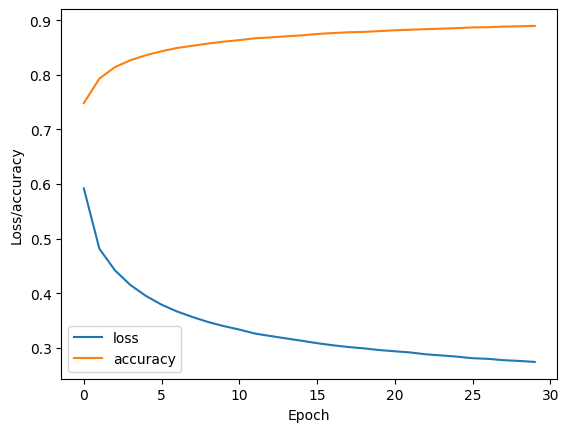

In [4]:
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=200, verbose=1)
val_mse, val_mae = model.evaluate(X_test_scaled, y_test, verbose=0)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/accuracy')
plt.legend()
plt.show()

In [5]:
model.save('forest_cover_classification.h5')

c:\Users\AdminIT\source\repos\python3\dlsp-portfolio-starter-code\venv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
